Data set is taken from here: https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl:1902.1/12379

In [1]:
# Import all the libraries used in the notebook
import pandas as pd
from matplotlib import pyplot as plt
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import scale
%matplotlib inline
import hdbscan
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from pprint import pprint

In [2]:
# read tab file of voting records (1948 - 2017)
df_votes = pd.read_csv('~/Desktop/dataverse_files/UNVotes1-72.tab',sep='\t')

In [3]:
# filter df for only voting members
df_votes = df_votes[df_votes.member == 1]

In [4]:
# Dropping country and countryname. Using ccode as country key
df_votes_year = df_votes.drop(['Country', 'Countryname'], axis=1) 

In [5]:
# Set a DF to only yes and no votes (0 nd 3)
df_votes_year_binary = df_votes_year[(df_votes_year.vote <= 1) | (df_votes_year.vote == 3)]
df_votes_year_binary.head(2)

,rcid,ccode,session,member,vote,year
0,3.0,2,1.0,1.0,1,1946
1,3.0,20,1.0,1.0,3,1946


In [6]:
# Turn 1 = yes and 3 = no into 0 = no and 1 = yes
df_votes_year_binary.vote = df_votes_year_binary.vote.replace(to_replace=3, value=0, inplace=False, limit=None, regex=False, method='pad', axis=None)
df_votes_year_binary.head(2)

/Users/jakerattner/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,rcid,ccode,session,member,vote,year
0,3.0,2,1.0,1.0,1,1946
1,3.0,20,1.0,1.0,0,1946


In [7]:
# drop session column and set equal to new df
df_year_features = df_votes_year_binary.drop(['session'], axis=1)

In [8]:
# Vote multiplied by res to create a new v_res column that gives the resolution number if 
# There was a yes vote.  This will be used later to create dummy columns
df_year_features['v_res'] = df_year_features['rcid']*df_year_features['vote']

In [9]:
#I'm creating a df that has one record for every UN nation so that it can be merged with our output later
df_name_index = pd.DataFrame(df_votes.groupby(['ccode', 'Countryname','Country'])['Countryname'].count())
df_name_index['count'] = df_name_index.Countryname
df_name_index = df_name_index.drop([ 'Countryname','count'], axis=1)
df_name_index.reset_index(inplace=True)
df_name_index.head(2)

,ccode,Countryname,Country
0,2,United States of America,USA
1,20,Canada,CAN


# Create function to create DFs for multiple years

In [10]:
# This function takes a year as an argument and returns a df with 1s and 0s indicating whether each member country
# voted on each resolution proposed in a that year
def create_year_df(year):
    df_output_year = df_year_features[df_year_features['year'] == year]
    df_output_year = pd.concat([df_output_year,pd.get_dummies(df_output_year.v_res, prefix='res_')], axis = 1)
    #print(df_output_year)
    try:
        df_output_year = df_output_year.drop(['year','rcid','member','v_res','vote', 'res__0.0'], axis=1)
    except:
        pass 
    df_output_year = df_output_year.set_index('ccode')
    df_output_year = df_output_year.groupby('ccode').sum()
    
    return df_output_year
create_year_df(1948);

In [11]:
# creating dictionary of years and corresponding dataframe names passing aech value from the 
# groups list into the for loop at the bottom of the cell
frames = {}
groups = [1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,  
          1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
          1975, 1976, 1977, 1978, 1978, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1986, 1988, 1989,
          1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
          2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
for grp in groups: 
    frames[grp] = create_year_df(grp)  

In [12]:
# read in descr file
df_descriptions = pd.read_csv('~/documents/UN-Capstone/Dscription.csv',skipinitialspace=True)

## Output function

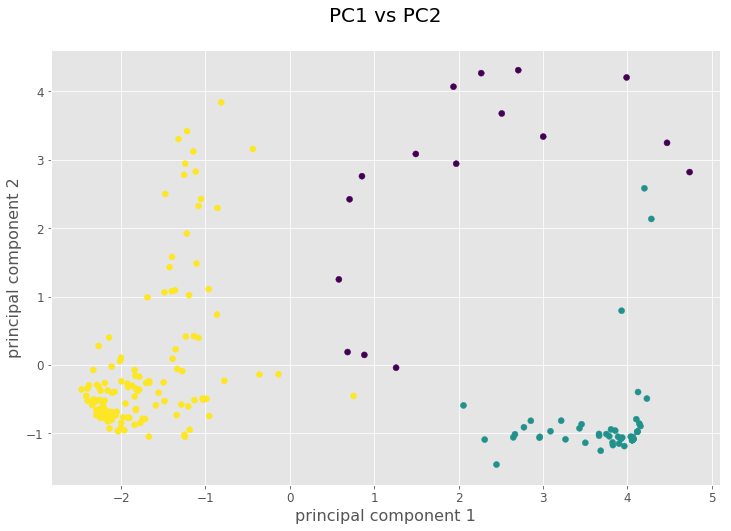

None
Estimated number of clusters: 2
Silhouette Coefficient: 0.413213


 Cluster 0: 50 
 ['Canada', 'United Kingdom of Great Britain and Northern Ireland', 'Ireland', 'Netherlands', 'Belgium', 'Luxembourg', 'France', 'Monaco', 'Liechtenstein', 'Switzerland', 'Spain', 'Andorra', 'Portugal', 'Germany', 'Poland', 'Austria', 'Hungary', 'Czech Republic', 'Slovakia', 'Italy', 'San Marino', 'Malta', 'Albania', 'Montenegro', 'The former Yugoslav Republic of Macedonia', 'Croatia', 'Yugoslavia', 'Bosnia and Herzegovina', 'Slovenia', 'Greece', 'Cyprus', 'Bulgaria', 'Republic of Moldova', 'Romania', 'Estonia', 'Latvia', 'Lithuania', 'Ukraine', 'Georgia', 'Finland', 'Sweden', 'Norway', 'Denmark', 'Iceland', 'Turkey', 'Republic of Korea', 'Japan', 'Australia', 'New Zealand', 'Micronesia (Federated States of)']


 Cluster 1: 127 
 ['Bahamas', 'Cuba', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Barbados', 'Dominica', 'Grenada', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Antigua a

0    Promotion of multilateralism in the area of disarmament and non-proliferation : resolution / adopted by th...
1    Follow-up to nuclear disarmament obligations agreed to at the 1995, 2000 and 2010 Review Conferences of th...
2                      No first placement of weapons in outer space : resolution / adopted by the General Assembly
3                                           Reducing nuclear danger : resolution / adopted by the General Assembly
4    Promotion of equitable geographical distribution in the membership of the human rights treaty bodies : res...
5       Convention on the Prohibition of the Use of Nuclear Weapons : resolution / adopted by the General Assembly
6                     Human rights and unilateral coercive measures : resolution / adopted by the General Assembly
7    A global call for concrete action for the total elimination of racism, racial discrimination, xenophobia a...
8                               Human rights and cultural diversity : resolution

In [13]:
# This function forms the basis of the project's finished product and contrains code for prosessing the 
# UN vote DFs and; running through HDBSCAN to create lusters, printing the number of clusters, printing
# a silhouette score, printing a list of countries in each cluster, running the df through PCA analysis, 
# outputting a visualization of clusters based on principle components 1 and 2, and listing the resultions
# which caused the groupings (top 5 contriubuting the most to vaiance)

def output_all(year):
    #HDBSCAN:
    hdbscn = hdbscan.HDBSCAN(min_cluster_size = 15, min_samples = 10, 
               gen_min_span_tree = True)
    hdbscn.fit(frames.get(year))
    hdbscn_labels = hdbscn.labels_
    hdbscn_n_clusters_ = len(set(hdbscn_labels)) - (1 if -1 in hdbscn_labels else 0)
    
    df_output_year = create_year_df(year);
    df_output_year['cluster'] = hdbscn.labels_
    df_output_year.reset_index(inplace=True)
    df_output_year = pd.merge(df_output_year, df_name_index, on='ccode')
    
    #Create cluster lists
    cluster0_list = df_output_year[df_output_year.cluster == 0]['Countryname'].tolist()
    cluster1_list = df_output_year[df_output_year.cluster == 1]['Countryname'].tolist()
    cluster2_list = df_output_year[df_output_year.cluster == 2]['Countryname'].tolist()
    cluster_Outlier_list = df_output_year[df_output_year.cluster == -1]['Countryname'].tolist()

    #PCA:
    df_PCA = df_output_year.drop(['Countryname','Country'], axis=1)
    df_features = df_PCA
    X = df_PCA
    X = X.set_index('ccode')
    pca = PCA()
    pca = pca.fit(X)
    Z = pca.transform(X)
    features_pca = ['PC'+str(i+1) for i in range(pca.n_components_)]
    
    Z = pd.DataFrame(Z, columns=features_pca)
    X.reset_index(inplace=True)
    X = X[['ccode','cluster']]
    
    X = X.join(Z, lsuffix='_caller', rsuffix='_other')
    df_PCA = pd.merge(X, df_PCA, on='ccode')
    df_PCA = df_PCA[['ccode','cluster_x',"PC1","PC2"]] 
    
    # Rolling Out PC1 components:
    PCA_abs = abs((pca.components_))[0]
    df_features = df_features.set_index(['ccode','cluster'])
    t = zip(df_features.columns, PCA_abs)
    result_list = list(t)
    df_componenets = pd.DataFrame(result_list)
    df_componenets.columns = ['rcid', 'score']
    df_componenets = df_componenets.sort_values('score',ascending=False)
    df_componenets['rcid'] = df_componenets['rcid'].map(lambda x: x.lstrip('res__'))
    df_componenets['rcid'] = df_componenets['rcid'].astype(float)
  
    df_componenets = pd.merge(df_componenets, df_descriptions, on='rcid')
    df_pca_desc = df_componenets.descr
    df_componenets = df_componenets.drop(['abstain','yes','no','session','date',
                                          'importantvote','unres','amend',
                                          'para', 'year','Unnamed: 0','descr'], axis=1) #,'me', 'nu','di', 'hr', 'co','ec','short'
    
    pd.set_option('display.max_colwidth',110)
    
    #Plot PCA
    fig = plt.figure(figsize=(12,8))
    ax = fig.gca()
    ax.scatter(Z.iloc[:,0], Z.iloc[:,1],
                       c=df_PCA.cluster_x)
    ax.set_xlabel('principal component 1', fontsize=16)
    ax.set_ylabel('principal component 2', fontsize=16)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 
    ax.set_title('PC1 vs PC2\n', fontsize=20)
    print(plt.show())
    
    # print HDBSCAN RESULTS:
    print('Estimated number of clusters: %d' % hdbscn_n_clusters_)
    # print('Homogeneity: %0.6f' % metrics.homogeneity_score(frames.get(year), hdbscn_labels))
    # print('Completeness: %0.6f' % metrics.completeness_score(y, hdbscn_labels))
    print('Silhouette Coefficient: %0.6f' % metrics.silhouette_score(frames.get(year), hdbscn_labels))
    
    print ("\n\n","Cluster 0:",len(cluster0_list),"\n",cluster0_list)
    print ("\n\n","Cluster 1:",len(cluster1_list),"\n",cluster1_list)
    if len(cluster2_list) > 0:
        print ("\n\n","Cluster 2:",len(cluster2_list),"\n",cluster2_list)
    else: ""
    
    print ("\n\n","Outliers:",len(cluster_Outlier_list),"\n",cluster_Outlier_list)
    
    print('\n',df_componenets.head(10))
    return df_pca_desc.head(10)
    
output_all(2015)  

In [14]:
# When looking at the above output I was able to do this: I noticed that in 1960 a majority of the resolutions
# having the greatest weighting from PCA analysis related to resolution related to the Repulic of the Congo.
# I can see that the clusters there appears to be a a split along traditional cold war lines.  If I googel Congo
# 1960: https://en.wikipedia.org/wiki/Congo_Crisis#United_Nations_escalation_and_the_end_of_the_Katangese_secession
# "Congo Crisis" comes up on the top.  The page says that there "August 1960, Central Intelligence Agency (CIA) 
# agents in the region reported to their agency that "Congo [is] experiencing [a] classic communist ... takeover" 
# and warned that the Congo might follow the same path as Cuba.". So, not perfect, but the results seem useful.

In [15]:
interact(output_all, year=widgets.IntSlider(min=1960,max=2017,step=1,value=10))

A Jupyter Widget

<function __main__.output_all>